In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


# Exploratory Data Analysis

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

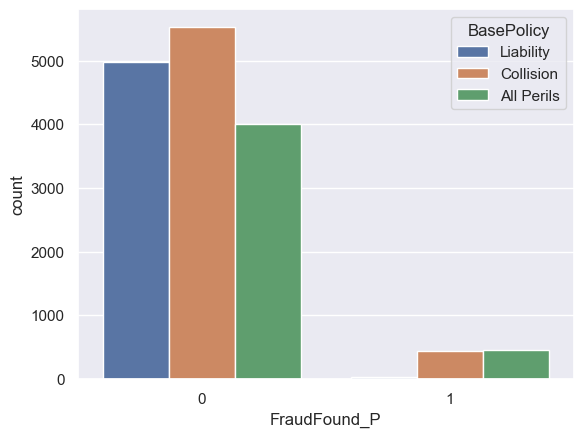

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="BasePolicy")
#Liability BasePolicy are unlikely to do fraud vehicle insurance claim

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

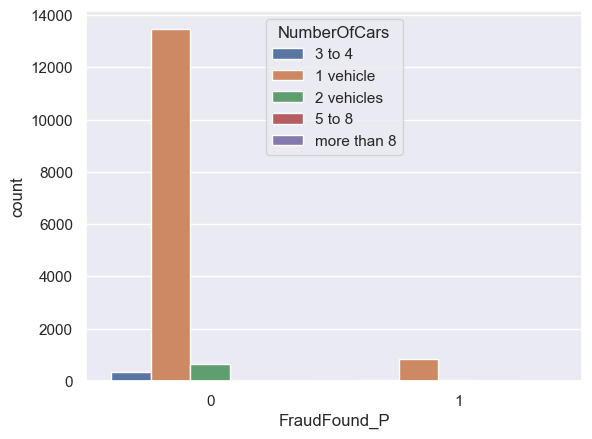

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="NumberOfCars")

<AxesSubplot:xlabel='Age', ylabel='Count'>

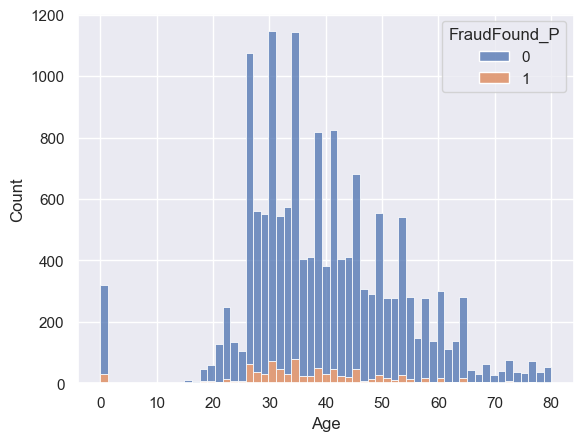

In [ ]:
sns.histplot(data=df, x="Age", hue="FraudFound_P", multiple="stack")

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

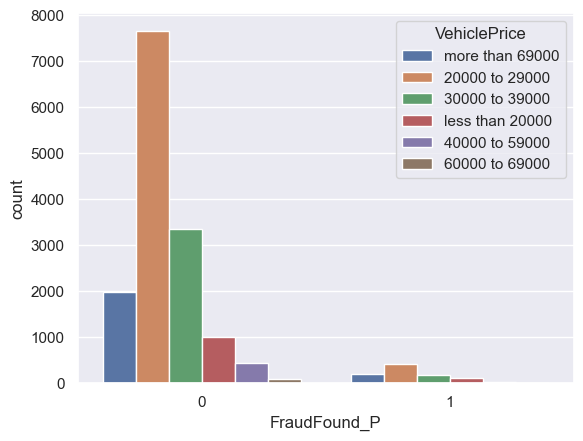

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="VehiclePrice")

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

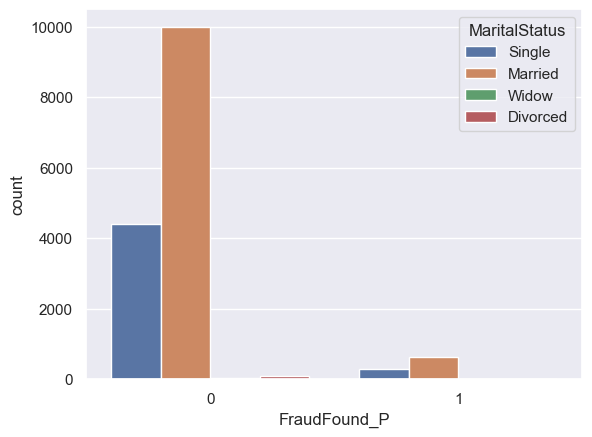

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="MaritalStatus")

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

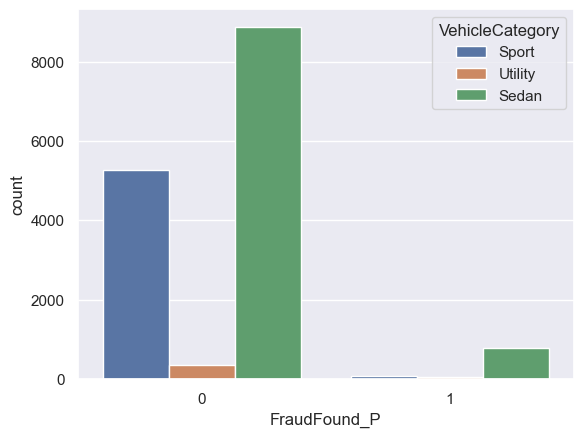

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="VehicleCategory")
#People with sport car are less likely to do fraud nisurance claim

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

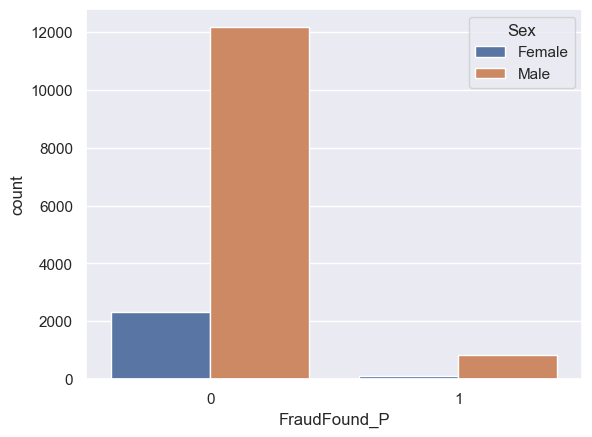

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="Sex")

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

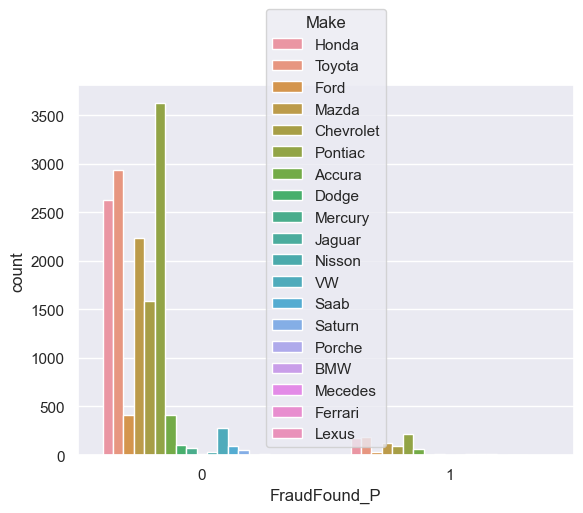

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="Make")

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

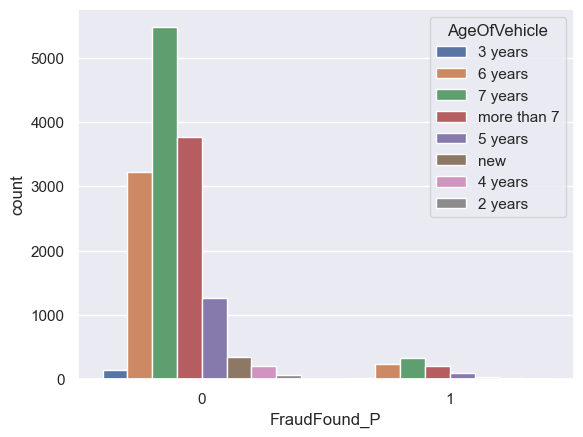

In [ ]:
sns.countplot(data=df, x="FraudFound_P", hue="AgeOfVehicle")

# Data Preprocessing

In [ ]:
print(df.apply(lambda col: col.unique()))

Month                   [Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...
WeekOfMonth                                               [5, 3, 2, 4, 1]
DayOfWeek               [Wednesday, Friday, Saturday, Monday, Tuesday,...
Make                    [Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...
AccidentArea                                               [Urban, Rural]
DayOfWeekClaimed        [Tuesday, Monday, Thursday, Friday, Wednesday,...
MonthClaimed            [Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...
WeekOfMonthClaimed                                        [1, 4, 2, 3, 5]
Sex                                                        [Female, Male]
MaritalStatus                          [Single, Married, Widow, Divorced]
Age                     [21, 34, 47, 65, 27, 20, 36, 0, 30, 42, 71, 52...
Fault                                        [Policy Holder, Third Party]
PolicyType              [Sport - Liability, Sport - Collision, Sedan -...
VehicleCategory                       

In [ ]:
df.select_dtypes(include='object').nunique()

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

In [ ]:
df.drop(columns=['MonthClaimed','Month'], inplace=True)
df.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,Wednesday,Honda,Urban,Tuesday,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,3,Wednesday,Honda,Urban,Monday,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,5,Friday,Honda,Urban,Thursday,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,2,Saturday,Toyota,Rural,Friday,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,5,Monday,Honda,Urban,Tuesday,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df['FraudFound_P'].unique()

array([0, 1], dtype=int64)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DayOfWeek']= label_encoder.fit_transform(df['DayOfWeek'])
df['DayOfWeek'].unique()

array([6, 0, 2, 1, 5, 3, 4])

In [ ]:
df['Make']= label_encoder.fit_transform(df['Make'])
df['Make'].unique()

array([ 6, 17,  5,  9,  2, 13,  0,  3, 11,  7, 12, 18, 15, 16, 14,  1, 10,
        4,  8])

In [ ]:
df['AccidentArea']= label_encoder.fit_transform(df['AccidentArea'])
df['AccidentArea'].unique()

array([1, 0])

In [ ]:
df['DayOfWeekClaimed']= label_encoder.fit_transform(df['DayOfWeekClaimed'])
df['DayOfWeekClaimed'].unique()

array([6, 2, 5, 1, 7, 3, 4, 0])

In [ ]:
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([0, 1])

In [ ]:
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df['MaritalStatus'].unique()

array([2, 1, 3, 0])

In [ ]:
df['Fault']= label_encoder.fit_transform(df['Fault'])
df['Fault'].unique()

array([0, 1])

In [ ]:
df['VehicleCategory']= label_encoder.fit_transform(df['VehicleCategory'])
df['VehicleCategory'].unique()

array([1, 2, 0])

In [ ]:
df['VehiclePrice']= label_encoder.fit_transform(df['VehiclePrice'])
df['VehiclePrice'].unique()

array([5, 0, 1, 4, 2, 3])

In [ ]:
df['Days_Policy_Accident']= label_encoder.fit_transform(df['Days_Policy_Accident'])
df['Days_Policy_Accident'].unique()

array([3, 1, 4, 0, 2])

In [ ]:
df['Days_Policy_Claim']= label_encoder.fit_transform(df['Days_Policy_Claim'])
df['Days_Policy_Claim'].unique()

array([2, 0, 1, 3])

In [ ]:
df['PastNumberOfClaims']= label_encoder.fit_transform(df['PastNumberOfClaims'])
df['PastNumberOfClaims'].unique()

array([3, 0, 1, 2])

In [ ]:
df['AgeOfVehicle']= label_encoder.fit_transform(df['AgeOfVehicle'])
df['AgeOfVehicle'].unique()

array([1, 4, 5, 6, 3, 7, 2, 0])

In [ ]:
df['AgeOfPolicyHolder']= label_encoder.fit_transform(df['AgeOfPolicyHolder'])
df['AgeOfPolicyHolder'].unique()

array([3, 4, 6, 7, 2, 5, 0, 8, 1])

In [ ]:
df['PoliceReportFiled']= label_encoder.fit_transform(df['PoliceReportFiled'])
df['PoliceReportFiled'].unique()

array([0, 1])

In [ ]:
df['WitnessPresent']= label_encoder.fit_transform(df['WitnessPresent'])
df['WitnessPresent'].unique()

array([0, 1])

In [ ]:
df['AgentType']= label_encoder.fit_transform(df['AgentType'])
df['AgentType'].unique()

array([0, 1])

In [ ]:
df['NumberOfSuppliments']= label_encoder.fit_transform(df['NumberOfSuppliments'])
df['NumberOfSuppliments'].unique()

array([3, 2, 1, 0])

In [ ]:
df['AddressChange_Claim']= label_encoder.fit_transform(df['AddressChange_Claim'])
df['AddressChange_Claim'].unique()

array([0, 3, 2, 1, 4])

In [ ]:
df['NumberOfCars']= label_encoder.fit_transform(df['NumberOfCars'])
df['NumberOfCars'].unique()

array([2, 0, 1, 3, 4])

In [ ]:
df['PolicyType']= label_encoder.fit_transform(df['PolicyType'])
df['PolicyType'].unique()

array([5, 4, 2, 6, 0, 1, 7, 8, 3])

In [ ]:
df['BasePolicy']= label_encoder.fit_transform(df['BasePolicy'])
df['BasePolicy'].unique()

array([2, 1, 0])

In [ ]:
df.head()

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,6,6,1,6,1,0,2,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
1,3,6,6,1,2,4,1,2,34,0,4,1,5,0,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1
2,5,0,6,1,5,2,1,1,47,0,4,1,5,0,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1
3,2,2,17,0,1,1,1,1,65,1,2,1,0,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2
4,5,1,6,1,6,2,0,2,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1


In [ ]:
df.dtypes

WeekOfMonth             int64
DayOfWeek               int32
Make                    int32
AccidentArea            int32
DayOfWeekClaimed        int32
WeekOfMonthClaimed      int64
Sex                     int32
MaritalStatus           int32
Age                     int64
Fault                   int32
PolicyType              int32
VehicleCategory         int32
VehiclePrice            int32
FraudFound_P            int64
PolicyNumber            int64
RepNumber               int64
Deductible              int64
DriverRating            int64
Days_Policy_Accident    int32
Days_Policy_Claim       int32
PastNumberOfClaims      int32
AgeOfVehicle            int32
AgeOfPolicyHolder       int32
PoliceReportFiled       int32
WitnessPresent          int32
AgentType               int32
NumberOfSuppliments     int32
AddressChange_Claim     int32
NumberOfCars            int32
Year                    int64
BasePolicy              int32
dtype: object

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    14497
1      923
Name: FraudFound_P, dtype: int64

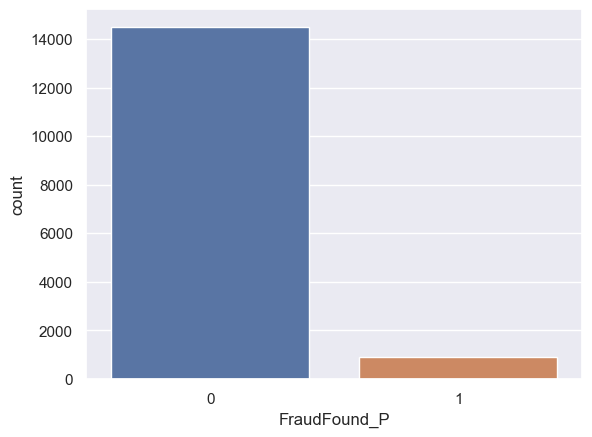

In [ ]:
#Check the target (FraudFound_P) if its balanced or not
sns.countplot(df['FraudFound_P'])
df['FraudFound_P'].value_counts()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['FraudFound_P']==0)] 
df_minority = df[(df['FraudFound_P']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 14497, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    14497
0    14497
Name: FraudFound_P, dtype: int64

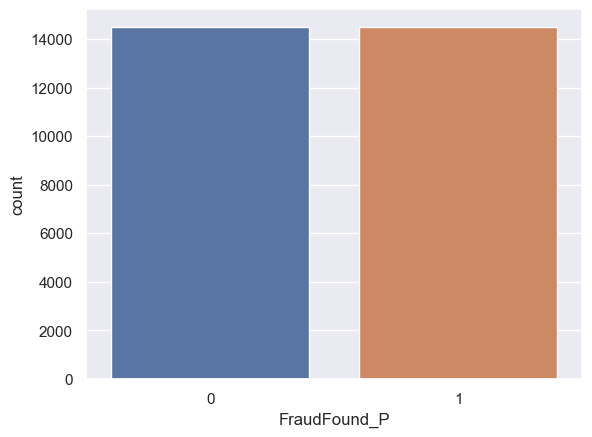

In [ ]:
sns.countplot(df_upsampled['FraudFound_P'])
df_upsampled['FraudFound_P'].value_counts()

In [ ]:
#Remove the outlier using Z-Score
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(22889, 31)

# Machine Learning Model Building

In [ ]:
X = data_clean.drop('FraudFound_P', axis=1)
y = data_clean['FraudFound_P']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.53 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9654573104497067
Precision Score :  0.9332213355732886
Recall Score :  1.0


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
29,BasePolicy,0.180418
9,Fault,0.164152
13,PolicyNumber,0.132251
8,Age,0.085426
14,RepNumber,0.070879
2,Make,0.042659
0,WeekOfMonth,0.042503
1,DayOfWeek,0.041352
5,WeekOfMonthClaimed,0.035878
4,DayOfWeekClaimed,0.032735


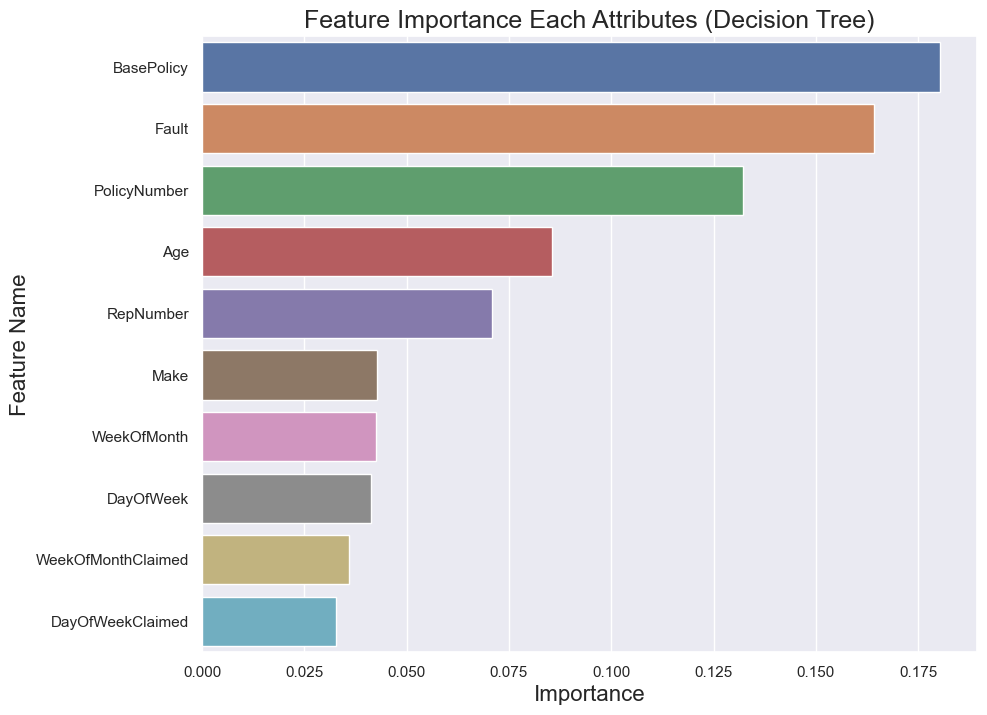

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score: 96.52686762778507')

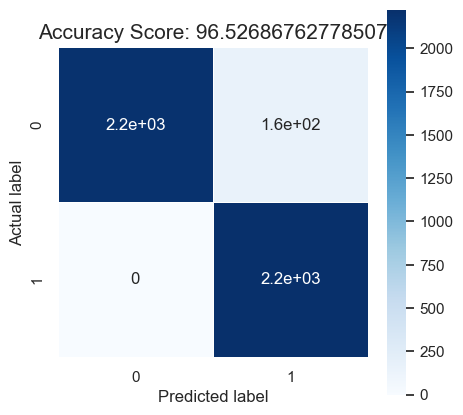

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

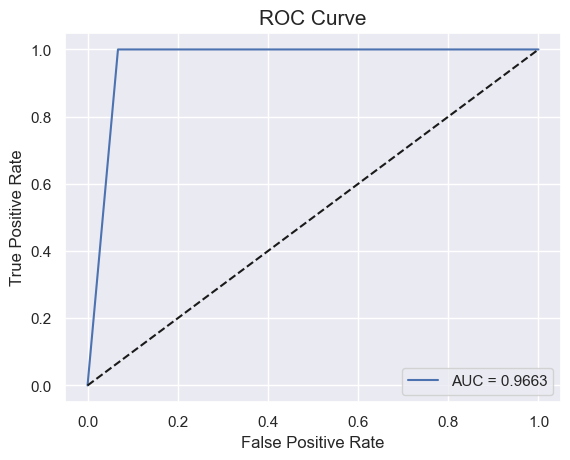

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.87 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9986516853932585
Precision Score :  0.9973070017953322
Recall Score :  1.0


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
9,Fault,0.163073
13,PolicyNumber,0.093436
8,Age,0.073123
29,BasePolicy,0.067381
14,RepNumber,0.062969
10,PolicyType,0.054149
2,Make,0.048224
1,DayOfWeek,0.046458
11,VehicleCategory,0.041706
4,DayOfWeekClaimed,0.038592


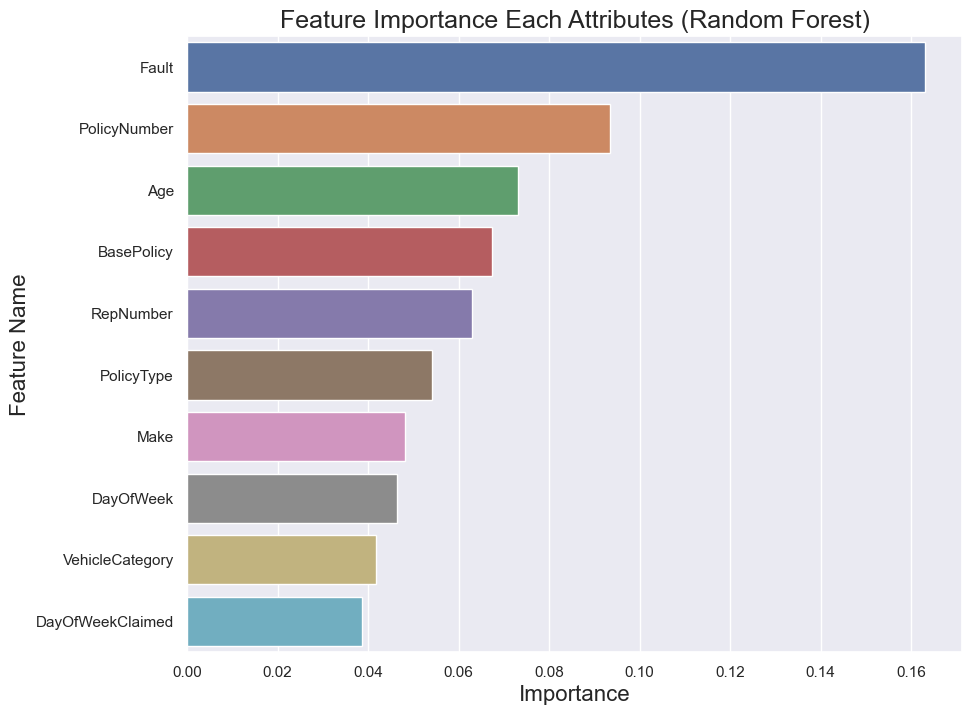

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score: 99.8689384010485')

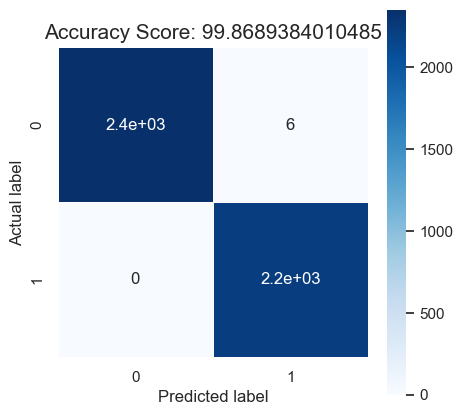

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

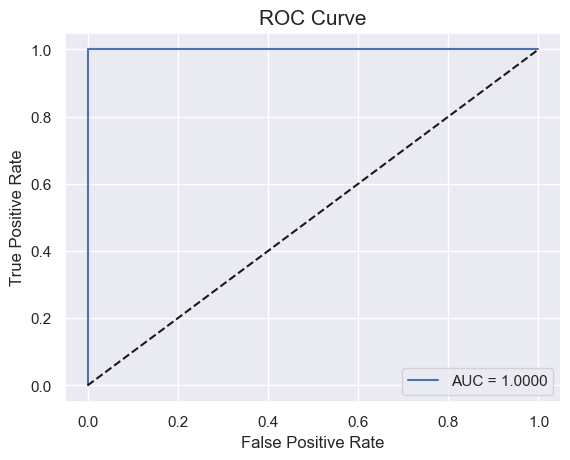

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()